In [8]:
# Step 0: Imports
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

In [14]:
def generate_fake_dataset(num_videos=5, num_users=50, bot_fraction=0.2):
    """
    Generates a simulated engagement events dataset with more realistic bot behavior.
    """
    events = []
    video_ids = [f"v{i+1}" for i in range(num_videos)]
    creator_ids = [f"c{i+1}" for i in range(num_videos)]
    user_ids = [f"u{i+1}" for i in range(num_users)]
    
    # Identify bot users
    num_bots = int(bot_fraction * num_users)
    bot_user_ids = set(random.sample(user_ids, num_bots))
    
    for video_id, creator_id in zip(video_ids, creator_ids):
        for user_id in user_ids:
            is_bot = user_id in bot_user_ids
            if is_bot:
                num_events = random.randint(5, 20)
                account_age = random.randint(0, 5)
                followers = random.randint(0, 5)
                ip = f"192.168.1.{random.randint(1,5)}"
            else:
                num_events = random.randint(0, 3)
                account_age = random.randint(30, 365)
                followers = random.randint(50, 500)
                ip = f"10.0.{random.randint(1,50)}.{random.randint(1,50)}"
            
            for _ in range(num_events):
                event_type = random.choices(
                    ["view", "like", "share", "comment"],
                    weights=[0.7, 0.2, 0.05, 0.05]
                )[0]
                
                if is_bot:
                    # Bots now engage over a 3-day window, not just minutes
                    timestamp = datetime.now() - timedelta(days=random.randint(0, 3), minutes=random.randint(0, 60*24))
                else:
                    timestamp = datetime.now() - timedelta(days=random.randint(0, 7),
                                                             minutes=random.randint(0, 60*24))
                
                events.append({
                    "event_id": f"e{len(events)+1}",
                    "event_type": event_type,
                    "video_id": video_id,
                    "creator_id": creator_id,
                    "user_id": user_id,
                    "timestamp": timestamp,
                    "user_account_age_days": account_age,
                    "user_followers": followers,
                    "user_ip": ip,
                    "is_bot": is_bot
                })
    
    return pd.DataFrame(events)

In [15]:
# Generate dataset
df_events = generate_fake_dataset(num_videos=5, num_users=50, bot_fraction=0.1)
print(df_events.head())

  event_id event_type video_id creator_id user_id                  timestamp  \
0       e1      share       v1         c1      u1 2025-08-21 10:59:38.680079   
1       e2       view       v1         c1      u3 2025-08-23 22:51:38.680122   
2       e3       like       v1         c1      u4 2025-08-27 09:10:38.680138   
3       e4       view       v1         c1      u5 2025-08-21 01:58:38.680149   
4       e5       view       v1         c1      u6 2025-08-26 17:14:38.680156   

   user_account_age_days  user_followers     user_ip  is_bot  
0                    346             500  10.0.20.12   False  
1                    351              64   10.0.36.1   False  
2                    153             115  10.0.27.16   False  
3                    177             140  10.0.24.50   False  
4                     35             294  10.0.33.18   False  


In [16]:
# -------------------------------
# Step 2: Export to CSV
# -------------------------------
df_events.to_csv("fake_tiktok_engagement.csv", index=False)
print("Dataset exported to fake_tiktok_engagement.csv")

Dataset exported to fake_tiktok_engagement.csv


C:\Users\jeany\AppData\Local\Temp\ipykernel_45420\3424717961.py:9: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_resampled = df_events.set_index('timestamp').groupby('video_id').resample('1D').count()['event_id'].reset_index()


Plot saved as log_engagements_per_day_by_video.png


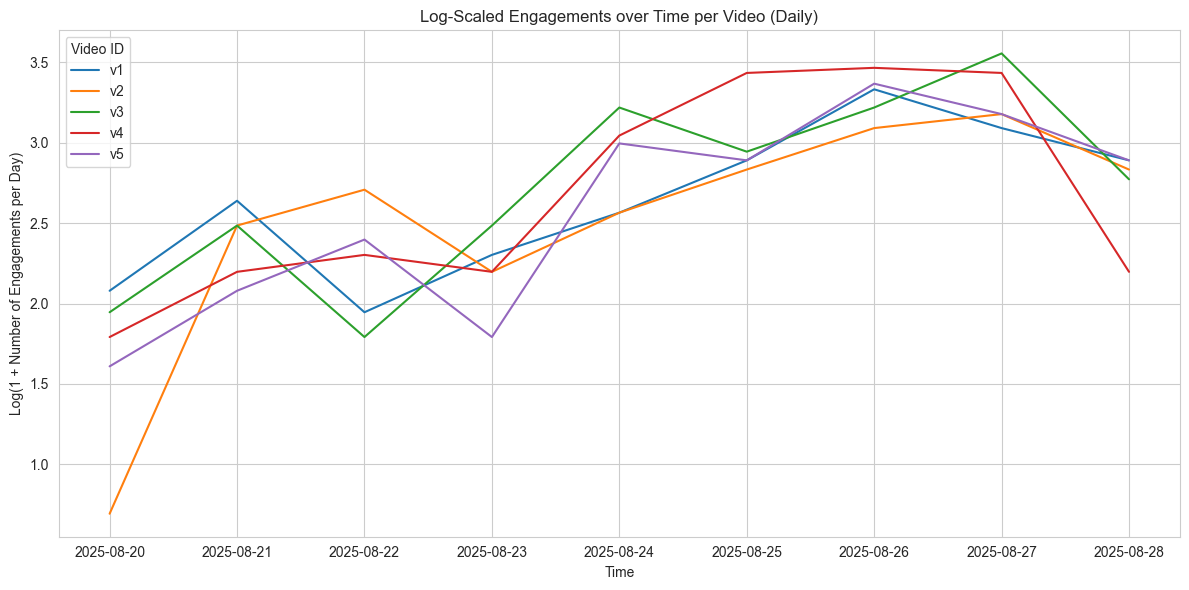

In [19]:
# -------------------------------
# Step 3: Visualization with Daily Sampling
# -------------------------------

# Convert timestamp to datetime
df_events['timestamp'] = pd.to_datetime(df_events['timestamp'])

# Resample the data to 1-day intervals and count events
df_resampled = df_events.set_index('timestamp').groupby('video_id').resample('1D').count()['event_id'].reset_index()

# Rename columns for clarity
df_resampled.columns = ['video_id', 'timestamp', 'engagement_count']

# Apply log1p transformation to engagement_count
df_resampled['log_engagement_count'] = np.log1p(df_resampled['engagement_count'])

# Create the plot with daily sampling and log scale
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resampled, x='timestamp', y='log_engagement_count', hue='video_id')
plt.title("Log-Scaled Engagements over Time per Video (Daily)")
plt.xlabel("Time")
plt.ylabel("Log(1 + Number of Engagements per Day)")
plt.legend(title='Video ID')
plt.tight_layout()
plt.savefig("log_engagements_per_day_by_video.png")

print("Plot saved as log_engagements_per_day_by_video.png")

C:\Users\jeany\AppData\Local\Temp\ipykernel_45420\2577098356.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df_events.set_index('timestamp').groupby('video_id').resample('1H').count()['event_id'].reset_index()
C:\Users\jeany\AppData\Local\Temp\ipykernel_45420\2577098356.py:9: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_resampled = df_events.set_index('timestamp').groupby('video_id').resample('1H').count()['event_id'].reset_index()


Plot saved as log_engagements_per_hour_by_video.png


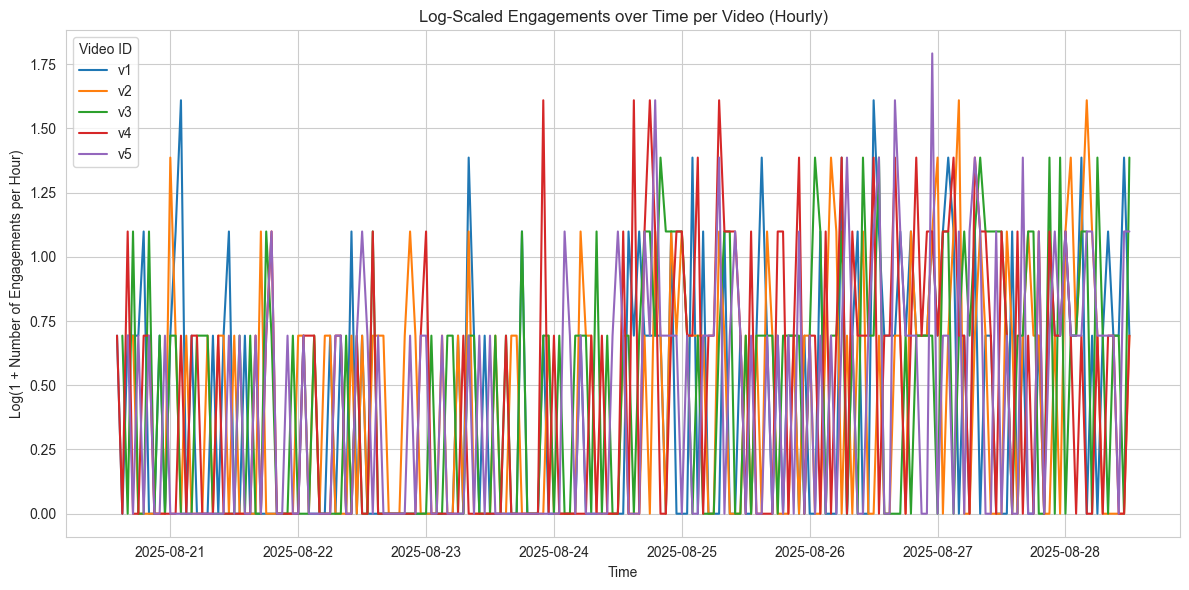

In [20]:
# -------------------------------
# Step 3: Visualization with Hourly Sampling
# -------------------------------

# Convert timestamp to datetime
df_events['timestamp'] = pd.to_datetime(df_events['timestamp'])

# Resample the data to 1-hour intervals and count events
df_resampled = df_events.set_index('timestamp').groupby('video_id').resample('1H').count()['event_id'].reset_index()

# Rename columns for clarity
df_resampled.columns = ['video_id', 'timestamp', 'engagement_count']

# Apply log1p transformation to engagement_count
df_resampled['log_engagement_count'] = np.log1p(df_resampled['engagement_count'])

# Create the plot with daily sampling and log scale
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resampled, x='timestamp', y='log_engagement_count', hue='video_id')
plt.title("Log-Scaled Engagements over Time per Video (Hourly)")
plt.xlabel("Time")
plt.ylabel("Log(1 + Number of Engagements per Hour)")
plt.legend(title='Video ID')
plt.tight_layout()
plt.savefig("log_engagements_per_hour_by_video.png")

print("Plot saved as log_engagements_per_hour_by_video.png")

C:\Users\jeany\AppData\Local\Temp\ipykernel_45420\3050481844.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df_events.set_index('timestamp').groupby('video_id').resample('1H').count()['event_id'].reset_index()
C:\Users\jeany\AppData\Local\Temp\ipykernel_45420\3050481844.py:9: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_resampled = df_events.set_index('timestamp').groupby('video_id').resample('1H').count()['event_id'].reset_index()


Plot saved as engagements_per_hour_by_video.png


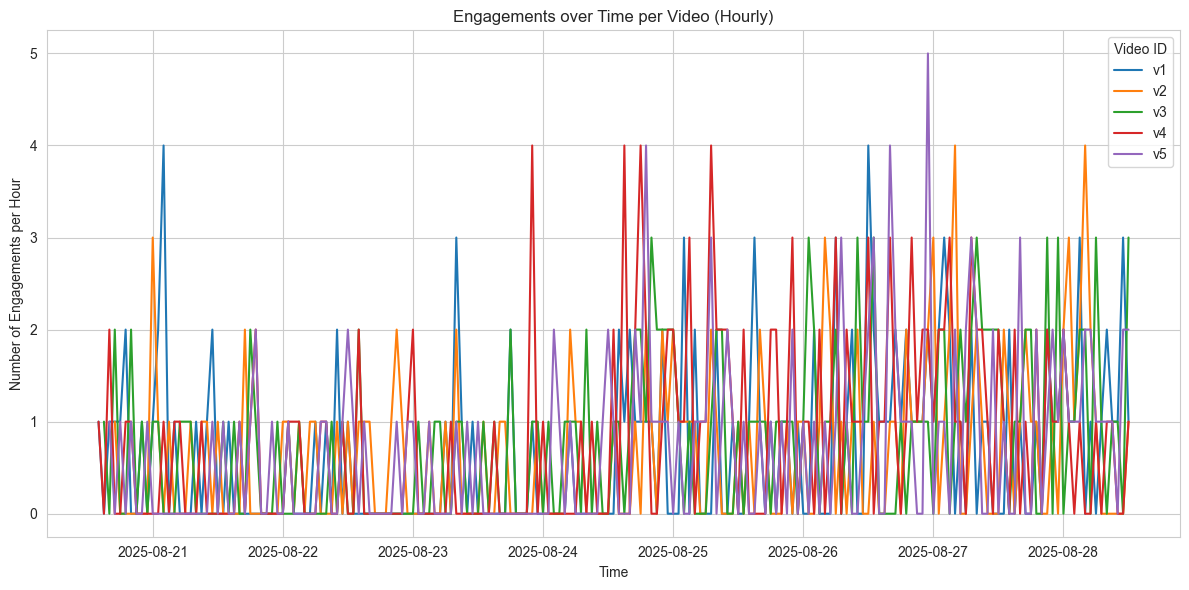

In [21]:
# -------------------------------
# Step 3: Visualization with Hourly Sampling
# -------------------------------

# Convert timestamp to datetime
df_events['timestamp'] = pd.to_datetime(df_events['timestamp'])

# Resample the data to 1-hour intervals and count events
df_resampled = df_events.set_index('timestamp').groupby('video_id').resample('1H').count()['event_id'].reset_index()

# Rename columns for clarity
df_resampled.columns = ['video_id', 'timestamp', 'engagement_count']

# Create the plot with hourly sampling
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resampled, x='timestamp', y='engagement_count', hue='video_id')
plt.title("Engagements over Time per Video (Hourly)")
plt.xlabel("Time")
plt.ylabel("Number of Engagements per Hour")
plt.legend(title='Video ID')
plt.tight_layout()
plt.savefig("engagements_per_hour_by_video.png")

print("Plot saved as engagements_per_hour_by_video.png")

### CLAUDE

In [4]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import json
from typing import Dict, List, Tuple
import hashlib

class UltimateBotDatasetGenerator:
    def __init__(self, seed=42):
        random.seed(seed)
        np.random.seed(seed)
        
        # Define bot archetypes with realistic characteristics
        self.bot_types = {
            "crude_bot": {
                "weight": 0.35,
                "account_age_range": (0, 14),
                "followers_range": (0, 100),
                "following_range": (500, 2000),
                "profile_completeness": 0.2,
                "burst_probability": 0.8,
                "off_hours_activity": 0.9,
                "engagement_velocity": "very_fast",
                "content_relevance": 0.1
            },
            "sophisticated_bot": {
                "weight": 0.25,
                "account_age_range": (30, 365),
                "followers_range": (200, 3000),
                "following_range": (100, 800),
                "profile_completeness": 0.7,
                "burst_probability": 0.4,
                "off_hours_activity": 0.3,
                "engagement_velocity": "fast",
                "content_relevance": 0.6
            },
            "compromised_account": {
                "weight": 0.15,
                "account_age_range": (180, 1000),
                "followers_range": (500, 8000),
                "following_range": (200, 1500),
                "profile_completeness": 0.9,
                "burst_probability": 0.6,
                "off_hours_activity": 0.7,
                "engagement_velocity": "medium",
                "content_relevance": 0.3
            },
            "purchased_followers": {
                "weight": 0.15,
                "account_age_range": (14, 180),
                "followers_range": (1000, 20000),
                "following_range": (50, 500),
                "profile_completeness": 0.8,
                "burst_probability": 0.5,
                "off_hours_activity": 0.5,
                "engagement_velocity": "medium",
                "content_relevance": 0.4
            },
            "coordinated_inauthentic": {
                "weight": 0.10,
                "account_age_range": (7, 90),
                "followers_range": (100, 1000),
                "following_range": (200, 1000),
                "profile_completeness": 0.6,
                "burst_probability": 0.9,
                "off_hours_activity": 0.8,
                "engagement_velocity": "very_fast",
                "content_relevance": 0.2
            }
        }
        
        # Video content types with different appeal to bots
        self.content_types = {
            "trending_dance": {"bot_attraction": 0.8, "human_engagement": 0.9},
            "political_content": {"bot_attraction": 0.9, "human_engagement": 0.6},
            "product_review": {"bot_attraction": 0.7, "human_engagement": 0.7},
            "educational": {"bot_attraction": 0.3, "human_engagement": 0.8},
            "comedy": {"bot_attraction": 0.4, "human_engagement": 0.9},
            "lifestyle": {"bot_attraction": 0.6, "human_engagement": 0.7},
            "controversy": {"bot_attraction": 0.95, "human_engagement": 0.5}
        }
        
        # Engagement velocity patterns (seconds between actions)
        self.velocity_patterns = {
            "very_fast": (0.1, 2),
            "fast": (1, 10),
            "medium": (10, 120),
            "slow": (120, 3600),
            "human_like": (30, 1800)
        }
        
    def generate_user_profile(self, user_id: str, is_bot: bool, bot_type: str = None) -> Dict:
        """Generate realistic user profile with all characteristics"""
        if is_bot and bot_type:
            bot_config = self.bot_types[bot_type]
            
            account_age = random.randint(*bot_config["account_age_range"])
            followers = random.randint(*bot_config["followers_range"])
            following = random.randint(*bot_config["following_range"])
            
            # Generate correlated characteristics
            profile_pic = random.random() < bot_config["profile_completeness"]
            bio_length = int(np.random.exponential(20)) if profile_pic else 0
            
            # Bot-specific patterns
            verification_status = False
            location_consistency = random.random() < 0.3  # Bots often have inconsistent locations
            
        else:
            # Human user characteristics
            account_age = int(np.random.exponential(200)) + 30
            followers = int(np.random.lognormal(4, 1.5))
            following = int(np.random.lognormal(4, 1))
            
            profile_pic = random.random() < 0.85
            bio_length = int(np.random.exponential(50)) if profile_pic else 0
            verification_status = random.random() < 0.02  # 2% verified humans
            location_consistency = random.random() < 0.9
            bot_type = "human"
        
        return {
            "user_id": user_id,
            "account_age_days": account_age,
            "followers_count": followers,
            "following_count": following,
            "profile_pic": profile_pic,
            "bio_length": bio_length,
            "verified": verification_status,
            "location_consistent": location_consistency,
            "bot_type": bot_type,
            "is_bot": is_bot
        }
    
    def generate_device_fingerprint(self, user_profile: Dict) -> Dict:
        """Generate realistic device and network characteristics"""
        is_bot = user_profile["is_bot"]
        
        if is_bot:
            # Bots often use automation tools or share devices
            user_agents = [
                "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36",
                "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36",
                "TikTok 1.0 (automated)"
            ]
            
            # Bots might use proxy networks or data centers
            if random.random() < 0.6:
                ip_prefix = random.choice(["185.220", "192.168", "10.0", "172.16"])  # Common proxy/VPN ranges
            else:
                ip_prefix = f"{random.randint(1,223)}.{random.randint(0,255)}"
                
            screen_resolution = random.choice(["1920x1080", "1366x768", "1024x768"])  # Common automated resolutions
            timezone_offset = random.choice([-8, -5, 0, 1, 8])  # Limited timezone variety
            
        else:
            # Humans have diverse devices and networks
            user_agents = [
                "Mozilla/5.0 (iPhone; CPU iPhone OS 15_0 like Mac OS X)",
                "Mozilla/5.0 (Android 11; Mobile; rv:92.0)",
                "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
                "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7)"
            ]
            
            ip_prefix = f"{random.randint(1,223)}.{random.randint(0,255)}"
            
            screen_resolutions = ["1920x1080", "1366x768", "414x896", "375x667", "1440x900", "1536x864"]
            screen_resolution = random.choice(screen_resolutions)
            timezone_offset = random.randint(-12, 12)
        
        return {
            "user_agent": random.choice(user_agents),
            "ip_address": f"{ip_prefix}.{random.randint(1,254)}.{random.randint(1,254)}",
            "screen_resolution": screen_resolution,
            "timezone_offset": timezone_offset
        }
    
    def generate_temporal_pattern(self, user_profile: Dict, num_events: int) -> List[datetime]:
        """Generate realistic temporal patterns for events"""
        is_bot = user_profile["is_bot"]
        bot_type = user_profile["bot_type"]
        
        base_time = datetime.now() - timedelta(days=random.randint(1, 30))
        timestamps = []
        
        if is_bot:
            bot_config = self.bot_types[bot_type]
            
            # Determine if this is a burst period
            if random.random() < bot_config["burst_probability"]:
                # Burst activity - many events in short time
                burst_duration = random.randint(10, 300)  # minutes
                for i in range(num_events):
                    offset_minutes = random.randint(0, burst_duration)
                    timestamp = base_time + timedelta(minutes=offset_minutes)
                    
                    # Add off-hours bias for bots
                    if random.random() < bot_config["off_hours_activity"]:
                        # Shift to off-hours (2-6 AM local time)
                        hour_shift = random.randint(2, 6)
                        timestamp = timestamp.replace(hour=hour_shift)
                    
                    timestamps.append(timestamp)
            else:
                # Distributed activity but still unnatural
                for i in range(num_events):
                    days_offset = random.randint(0, 7)
                    minutes_offset = random.randint(0, 1440)
                    timestamp = base_time + timedelta(days=days_offset, minutes=minutes_offset)
                    timestamps.append(timestamp)
        else:
            # Human-like temporal patterns
            for i in range(num_events):
                days_offset = int(np.random.exponential(2))  # Humans engage more recently
                
                # Human circadian rhythm - more active during day
                hour_weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 
                               1.0, 1.0, 0.9, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 
                               0.6, 0.4, 0.3, 0.2]
                hour = random.choices(range(24), weights=hour_weights)[0]
                minute = random.randint(0, 59)
                
                timestamp = base_time + timedelta(days=days_offset, hours=hour, minutes=minute)
                timestamps.append(timestamp)
        
        return sorted(timestamps)
    
    def calculate_engagement_metrics(self, events: List[Dict], user_profile: Dict) -> Dict:
        """Calculate sophisticated engagement metrics"""
        if not events:
            return {}
        
        timestamps = [event["timestamp"] for event in events]
        event_types = [event["event_type"] for event in events]
        
        # Time-based metrics
        time_diffs = [(timestamps[i+1] - timestamps[i]).total_seconds() 
                      for i in range(len(timestamps)-1)]
        
        avg_time_between_events = np.mean(time_diffs) if time_diffs else 0
        std_time_between_events = np.std(time_diffs) if time_diffs else 0
        
        # Engagement sequence patterns
        sequence_score = 0
        for i in range(len(events)-1):
            curr_type = events[i]["event_type"]
            next_type = events[i+1]["event_type"]
            
            # Natural progression: view -> like -> share/comment
            natural_sequences = [
                ("view", "like"), ("like", "share"), ("like", "comment"),
                ("view", "share"), ("view", "comment")
            ]
            
            if (curr_type, next_type) in natural_sequences:
                sequence_score += 1
            elif curr_type == next_type:  # Repeated same action
                sequence_score -= 0.5
        
        # Content relevance (simplified)
        unique_videos = len(set(event["video_id"] for event in events))
        engagement_diversity = unique_videos / len(events) if events else 0
        
        return {
            "avg_time_between_events": avg_time_between_events,
            "std_time_between_events": std_time_between_events,
            "sequence_naturalness_score": sequence_score,
            "engagement_diversity": engagement_diversity,
            "total_events": len(events),
            "unique_videos_engaged": unique_videos
        }
    
    def generate_dataset(self, num_videos=50, num_users=1000, bot_fraction=0.25, save_to_csv=True, filename="ultimate_bot_dataset.csv"):
        """Generate the complete authentic bot detection dataset"""
        
        print(f"Generating dataset with {num_users} users, {bot_fraction*100}% bots...")
        
        # Generate video metadata
        videos = []
        for i in range(num_videos):
            content_type = random.choice(list(self.content_types.keys()))
            video_data = {
                "video_id": f"v{i+1}",
                "creator_id": f"creator_{i+1}",
                "content_type": content_type,
                "upload_date": datetime.now() - timedelta(days=random.randint(1, 90)),
                "trending_score": random.uniform(0, 1),
                **self.content_types[content_type]
            }
            videos.append(video_data)
        
        # Generate user profiles
        num_bots = int(num_users * bot_fraction)
        bot_users = []
        human_users = []
        
        # Create bot users with different types
        for i in range(num_bots):
            bot_type = random.choices(
                list(self.bot_types.keys()),
                weights=[self.bot_types[bt]["weight"] for bt in self.bot_types.keys()]
            )[0]
            
            user_profile = self.generate_user_profile(f"bot_user_{i+1}", True, bot_type)
            bot_users.append(user_profile)
        
        # Create human users
        for i in range(num_users - num_bots):
            user_profile = self.generate_user_profile(f"human_user_{i+1}", False)
            human_users.append(user_profile)
        
        all_users = bot_users + human_users
        random.shuffle(all_users)  # Mix bots and humans
        
        print(f"Generated {len(bot_users)} bot users and {len(human_users)} human users")
        
        # Generate engagement events
        all_events = []
        
        for user_idx, user_profile in enumerate(all_users):
            if user_idx % 100 == 0:
                print(f"Processing user {user_idx+1}/{len(all_users)}...")
                
            device_info = self.generate_device_fingerprint(user_profile)
            user_events = []
            
            # Determine engagement level based on user type
            if user_profile["is_bot"]:
                bot_config = self.bot_types[user_profile["bot_type"]]
                
                # Bots engage with content based on attraction level
                for video in videos:
                    if random.random() < video["bot_attraction"] * 0.7:  # Scale down for realism
                        num_events = random.choices([1, 2, 3, 4, 5], weights=[0.4, 0.3, 0.15, 0.1, 0.05])[0]
                        
                        # Generate events for this video
                        event_times = self.generate_temporal_pattern(user_profile, num_events)
                        
                        for timestamp in event_times:
                            # Bot event type selection
                            event_type = random.choices(
                                ["view", "like", "share", "comment"],
                                weights=[0.6, 0.25, 0.1, 0.05]
                            )[0]
                            
                            # Add engagement velocity
                            velocity_type = bot_config["engagement_velocity"]
                            velocity_range = self.velocity_patterns[velocity_type]
                            engagement_duration = random.uniform(*velocity_range)
                            
                            event = {
                                "event_id": f"e_{len(all_events)+1}",
                                "user_id": user_profile["user_id"],
                                "video_id": video["video_id"],
                                "creator_id": video["creator_id"],
                                "event_type": event_type,
                                "timestamp": timestamp,
                                "engagement_duration": engagement_duration,
                                "content_type": video["content_type"],
                                **user_profile,
                                **device_info
                            }
                            
                            user_events.append(event)
                            all_events.append(event)
            
            else:
                # Human users - more natural engagement
                engaged_videos = random.sample(videos, k=random.randint(1, min(10, len(videos))))
                
                for video in engaged_videos:
                    if random.random() < video["human_engagement"] * 0.5:  # Humans are more selective
                        num_events = random.choices([1, 2, 3], weights=[0.7, 0.2, 0.1])[0]
                        
                        event_times = self.generate_temporal_pattern(user_profile, num_events)
                        
                        for timestamp in event_times:
                            # Human event type selection
                            event_type = random.choices(
                                ["view", "like", "share", "comment"],
                                weights=[0.8, 0.15, 0.03, 0.02]
                            )[0]
                            
                            engagement_duration = random.uniform(*self.velocity_patterns["human_like"])
                            
                            event = {
                                "event_id": f"e_{len(all_events)+1}",
                                "user_id": user_profile["user_id"],
                                "video_id": video["video_id"],
                                "creator_id": video["creator_id"],
                                "event_type": event_type,
                                "timestamp": timestamp,
                                "engagement_duration": engagement_duration,
                                "content_type": video["content_type"],
                                **user_profile,
                                **device_info
                            }
                            
                            user_events.append(event)
                            all_events.append(event)
            
            # Calculate advanced metrics for this user
            if user_events:
                engagement_metrics = self.calculate_engagement_metrics(user_events, user_profile)
                
                # Add metrics to all events for this user
                for event in user_events:
                    event.update(engagement_metrics)
        
        print(f"Generated {len(all_events)} total engagement events")
        
        # Convert to DataFrame
        df = pd.DataFrame(all_events)
        
        if save_to_csv:
            df.to_csv(filename, index=False)
            print(f"Dataset saved to {filename}")
            print(f"Shape: {df.shape}")
            print(f"Bot events: {df['is_bot'].sum()}")
            print(f"Human events: {(~df['is_bot']).sum()}")
        
        return df

# Usage example
if __name__ == "__main__":
    generator = UltimateBotDatasetGenerator(seed=42)
    
    # Generate a comprehensive dataset
    dataset = generator.generate_dataset(
        num_videos=100,
        num_users=1000,
        bot_fraction=0.015,
        save_to_csv=True,
        filename="ultimate_bot_detection_dataset.csv"
    )
    
    # Display summary statistics
    print("\n" + "="*50)
    print("DATASET SUMMARY")
    print("="*50)
    print(f"Total events: {len(dataset)}")
    print(f"Total users: {dataset['user_id'].nunique()}")
    print(f"Total videos: {dataset['video_id'].nunique()}")
    print(f"Bot events: {dataset['is_bot'].sum()} ({dataset['is_bot'].mean()*100:.1f}%)")
    print(f"Human events: {(~dataset['is_bot']).sum()} ({(1-dataset['is_bot'].mean())*100:.1f}%)")
    
    print("\nBot Types Distribution:")
    bot_types = dataset[dataset['is_bot']]['bot_type'].value_counts()
    for bot_type, count in bot_types.items():
        print(f"  {bot_type}: {count}")
    
    print("\nEvent Types Distribution:")
    event_types = dataset['event_type'].value_counts()
    for event_type, count in event_types.items():
        print(f"  {event_type}: {count}")
    
    print("\nContent Types Distribution:")
    content_types = dataset['content_type'].value_counts()
    for content_type, count in content_types.items():
        print(f"  {content_type}: {count}")

Generating dataset with 1000 users, 1.5% bots...
Generated 15 bot users and 985 human users
Processing user 1/1000...
Processing user 101/1000...
Processing user 201/1000...
Processing user 301/1000...
Processing user 401/1000...
Processing user 501/1000...
Processing user 601/1000...
Processing user 701/1000...
Processing user 801/1000...
Processing user 901/1000...
Generated 4302 total engagement events
Dataset saved to ultimate_bot_detection_dataset.csv
Shape: (4302, 27)
Bot events: 1537
Human events: 2765

DATASET SUMMARY
Total events: 4302
Total users: 826
Total videos: 100
Bot events: 1537 (35.7%)
Human events: 2765 (64.3%)

Bot Types Distribution:
  sophisticated_bot: 407
  crude_bot: 326
  purchased_followers: 312
  coordinated_inauthentic: 291
  compromised_account: 201

Event Types Distribution:
  view: 3146
  like: 774
  share: 231
  comment: 151

Content Types Distribution:
  trending_dance: 857
  political_content: 771
  lifestyle: 760
  controversy: 597
  educational: 573